## Customer segmentation project

### Import all the relevant packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics

import joblib

import warnings

### Import the dataset

In [2]:
df = pd.read_csv('Customer Data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


###  Some data cleaning, preparation and visualization

In [3]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

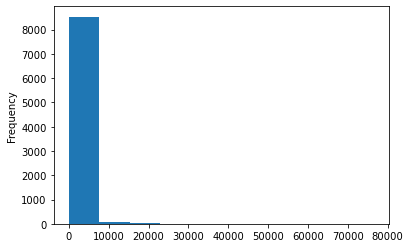

In [4]:
df['MINIMUM_PAYMENTS'].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

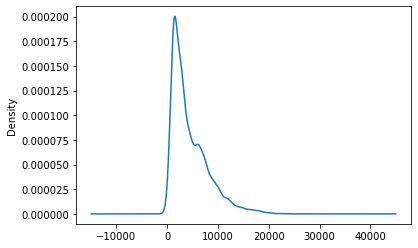

In [5]:
df['CREDIT_LIMIT'].plot(kind='kde')

In [6]:
# due to the skewnes of the distribution, the null values will be replaced by the median of the column
df['MINIMUM_PAYMENTS'] = df["MINIMUM_PAYMENTS"].fillna(df['MINIMUM_PAYMENTS'].median())
# due to the skewnes of the distribution, the null values will be replaced by the mean of the column
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
# check for duplicates
df.duplicated().sum()

0

In [8]:
# Drop the CUST_ID column
df.drop(columns=['CUST_ID'], axis=1, inplace=True)

### Feature Engineering

In [9]:
# Scale the dataframe
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
# Reduce dimensionality by converting the dataframe into 2D dataframe for visualization
pca = PCA(n_components=2)
# the goal of PCA is to reduce the dimentionality of a dataset while preserving as much information as possible.
# PCA does this by finding the principal components of the dataset, which are linear combinations of the original
# features that explain the most variation in the data. used for visualization, feature selection and outlayer detection.
principal_components = pca.fit_transform(scaled_df)
pca_df =  pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
pca_df 

,PCA1,PCA2
0,-1.683626,-1.072302
1,-1.134175,2.509091
2,0.969383,-0.383583
3,-0.888249,0.004615
4,-1.600012,-0.683859
...,...,...
8945,-0.362483,-2.013396
8946,-0.580730,-1.675629
8947,-0.928899,-1.808013
8948,-2.337787,-0.653601


### Hyperparameter tuning

Select the best value of "k" using the elbow method

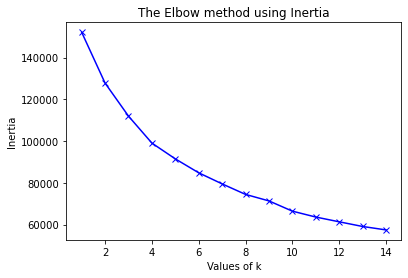

In [10]:
inertia = []
range_val = range(1, 15)
for i in range_val:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(pd.DataFrame(scaled_df))
    # KMeans.inertia_ is the total within-cluster sum of squers. it is a measure of how well the data is clustered together
    inertia.append(kmeans.inertia_)
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of k')
plt.ylabel('Inertia')
plt.title('The Elbow method using Inertia')

plt.show()

From the plot, it can be seen that the elbow appears at k = 4, hence that will be the number of clusters.

### Building of KMeans model and visualizing its cluster


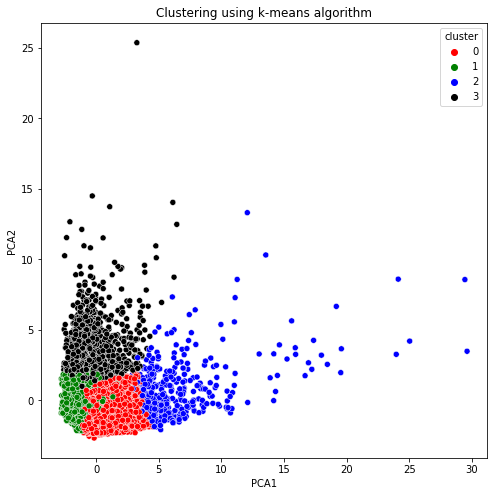

In [11]:
kmeans_model = KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({
    'cluster': kmeans_model.labels_
})], axis=1)
# Visualization
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue='cluster', data=pca_df_kmeans, palette=['red', 'green', 'blue', 'black'])
plt.title("Clustering using k-means algorithm")
plt.show()

### Adding the segments to the original data

In [12]:
cluster_df = pd.concat([df, pd.DataFrame({
    'segment': kmeans_model.labels_
})], axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,segment
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


<AxesSubplot:xlabel='segment', ylabel='count'>

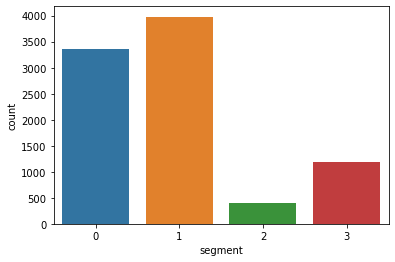

In [13]:
sns.countplot(x = 'segment', data=cluster_df)

In [ ]:
# Saving the segmentation model
joblib.dump(kmeans_model, "kmeans_model.pkl")

### building a prediction model off the new dataset

In [14]:
# Spliting the data into trainig and testing datasets
X = cluster_df.drop(['segment'], axis=1)
y = cluster_df['segment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [15]:
# Using decison tree classifier to train on train dataset
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Model testing
metrics.confusion_matrix(y_test, y_pred)

array([[ 972,   28,   10,   13],
       [  33, 1102,    2,   29],
       [   9,    3,  108,    1],
       [  11,   29,    0,  335]], dtype=int64)

In [17]:
# Model testing
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1023
           1       0.95      0.95      0.95      1166
           2       0.90      0.89      0.90       121
           3       0.89      0.89      0.89       375

    accuracy                           0.94      2685
   macro avg       0.92      0.92      0.92      2685
weighted avg       0.94      0.94      0.94      2685



The model performed well with an accuracy of 94%

### Save the final segment prediction model

In [18]:

joblib.dump(kmeans_model, "segmentation_prediction_model.pkl")

['segmentation_prediction_model.pkl']